Here we show the dynamic capital asset pricing model (time varying CAPM), in which the regression coefficients change with time.
Such formualtion calls for a thorough analysis of the Kalman filter algorithm; this algorithm needs many customizing since the number of software programs addressing the problem is limited and proper handling of them depends on an awareness of how the algorithm operates and what are the parameters to be estimated.

The text file for the data can be downloaded from (chapter 11, text file No.2):

https://faculty.chicagobooth.edu/ruey-s-tsay/research/analysis-of-financial-time-series-3rd-edition

At last the results inspire an interepretation based on the model parameters and whether such a model is better than the OLS regression in this dataset.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import norm
from scipy.optimize import minimize

In [2]:
data = pd.read_csv('Stocks_data.txt',delim_whitespace=True)
data.head(5)

,AA,AGE,CAT,F,FDX,GM,HPQ,KMB,MEL,NYT,PG,TRB,TXN,SP5
0,-16.40,-12.17,-4.44,-0.06,-2.28,-2.12,-6.19,-11.01,-10.77,-6.30,-8.89,-13.04,-7.61,-7.52
1,4.04,4.95,8.84,6.02,10.47,8.97,-4.01,-5.20,0.34,-4.62,-0.84,-0.37,4.97,0.21
2,0.12,13.08,0.17,2.06,10.84,1.57,5.67,3.21,-0.17,-0.66,5.41,2.36,2.69,1.77
3,-4.28,-11.06,0.25,-5.67,-2.44,-4.19,-5.29,-0.65,-2.20,-10.60,4.26,-7.98,-6.85,-3.34
4,5.81,19.70,8.52,3.89,-16.17,10.94,8.81,8.83,11.85,11.59,16.35,8.82,22.88,8.55


In [3]:
data.dtypes

AA     float64
AGE    float64
CAT    float64
F      float64
FDX    float64
GM     float64
HPQ    float64
KMB    float64
MEL    float64
NYT    float64
PG     float64
TRB    float64
TXN    float64
SP5    float64
dtype: object

In [ ]:
y = data['GM']
x = sm.add_constant(data['SP5'])
model = sm.OLS(y, x).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                     GM   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     51.78
Date:                Sat, 14 Jun 2025   Prob (F-statistic):           2.03e-11
Time:                        19:03:40   Log-Likelihood:                -589.43
No. Observations:                 168   AIC:                             1183.
Df Residuals:                     166   BIC:                             1189.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1982      0.630      0.315      0.7

0.19820249373343998

Text(0.5, 1.0, 'GM Excess Returns')

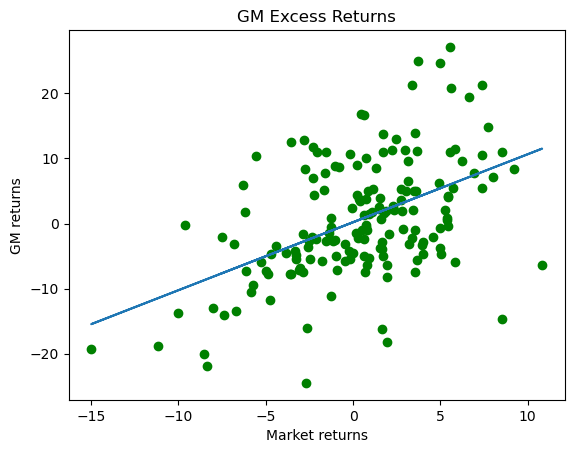

In [5]:
plt.scatter(data['SP5'], data['GM'],color= 'green')
plt.xlabel('Market returns')
plt.ylabel('GM returns')
plt.plot(data['SP5'], 0.1982 + 1.0457*data['SP5'] )
plt.title('GM Excess Returns')

The CAPM model is given by:
$$ r_t = \alpha_{t} + \beta_{t} r_{t}^{M}+ \epsilon_t, \epsilon_t \sim N(0, \sigma_{\epsilon}^2)$$
$$ r_t = \begin{bmatrix} 
1 &  r_{t}^{M}
\end{bmatrix} \begin{bmatrix} 
\alpha_{t} \\
\beta_{t}
\end{bmatrix} +  \epsilon_t $$
Let $$ \begin{bmatrix} 
1 &  r_{t}^{M}
\end{bmatrix} = H'_t$$
and, $$\begin{bmatrix} 
\alpha_{t} \\
\beta_{t}
\end{bmatrix} = \bold{\mu_{t}}$$
The observation equation is written as:
$$ r_t = H'_t \bold{\mu_{t}}+ \epsilon_t,  \epsilon_t \sim N(0, \sigma_{\epsilon}^2)$$
While the state equation is written as:
$$ \bold{\mu_{t}} = \bold{\mu_{t-1}} + \eta_t, \eta_t \sim N(0, Q)$$
The unconditional variance of the state vector $\mu_{t}$ is given by the matrix $\Sigma$ and the matrix $Q$ is the variance matrix of the state noise, $\eta_t$.
$$Q =   \begin{bmatrix} 
\sigma_{\eta_1}^{2} & 0\\
0 & \sigma_{\eta_2}^{2}
\end{bmatrix} $$

The first thing to notice since now the state equation is expressed in a vector form, what will be the conditional variance of the vector $\mu_{t}$.
$$ E[\mu_{t}|\mathcal{I}_{t-1}] = \mu_{t|t-1}$$
$$Var[\mu_{t}|\mathcal{I}_{t-1}] = E[(\mu_{t} - \mu_{t|t-1})(\mu_{t} - \mu_{t|t-1})' ] = \Sigma_{t|t-1}$$

The prediction of the observation based on the information up to time t-1,
$$ E[r_{t}|\mathcal{I}_{t-1}] = H'_t\mu_{t|t-1}$$
The variance of the observation prediction:
$$ E[(r_t - r_{t}|\mathcal{I}_{t-1})(r_t - r_{t}|\mathcal{I}_{t-1})'] = E[(H'_t \mu_t + \epsilon_t  - H'_t\mu_{t|t-1})(H'_t \mu_t + \epsilon_t - H'_t\mu_{t|t-1})']$$
Which is:
$$Var[r_t|\mathcal{I}_{t-1}] = H_t'\Sigma_{t|t-1} H_t + \sigma_{\epsilon}^2$$


The last point worth menioning is the covariance between the state and the observations.
$$ Cov(\mu_t, r_t|\mathcal{I}_{t-1}) = E[( \mu_t- \mu_t|\mathcal{I}_{t-1})(r_t - r_{t}|\mathcal{I}_{t-1})'] = E[( \mu_t- \mu_{t|t-1})(r_t - H'_t\mu_{t|t-1})'] $$
$$ E[(\mu_t- \mu_{t|t-1})(H'_t \mu_t + \epsilon_t  - H'_t\mu_{t|t-1})'] = E[(\mu_t- \mu_{t|t-1}) (H'_t (\mu_t - \mu_{t|t-1}))' + \epsilon_t(\mu_t- \mu_{t|t-1})']$$
Which is:
$$ Cov(\mu_t, r_t|\mathcal{I}_{t-1}) = \Sigma_{t|t-1} H_t

In [15]:
# prova:
H0 = np.array([1, -7.52])
H0 = np.matrix(H0)
SS1 = np.matrix('1000,0;0,1000')
n1 = H0*SS1*np.transpose(H0) + 0.7
g1 = SS1*np.transpose(H0)/(n1)
v1 = data['GM'][0]- H0*np.matrix('0;0')

mu1 = np.matrix('0;0') + (SS1*np.transpose(H0)*v1)/n1
mu1 # matrix([[-0.03683683],
      #  [ 0.27701295]])
Q = np.array([[0.5,0],[0,0.5]])
Q = np.matrix(Q)
SS2 = Q + SS1 - (SS1*np.transpose(H0)*H0*np.transpose(SS1))/n1
SS2
#matrix([[983.12413751, 130.66648596],[130.66648596,  17.8880256 ]])

matrix([[983.12413751, 130.66648596],
        [130.66648596,  17.8880256 ]])

First if we start with the initial guess 
$$ \mu_{1|0} = \begin{bmatrix} 
\alpha_{1} \\
\beta_{1}
\end{bmatrix} = \begin{bmatrix} 0\\0\end{bmatrix}$$
And the covariance of this state is intialized using the diffussion conditions:
$$ \Sigma_{1|0} = \begin{bmatrix} 10000 & 0\\ 0 & 10000 \end{bmatrix}$$
The intial observation is $$ H'_1 = \begin{bmatrix} 1 &  r_{1}^{M}\end{bmatrix}= \begin{bmatrix} 1 &  -7.52\end{bmatrix} $$
The recurssions start with the arrival of the first observation ($r_1 = -2.12$) computing the predition error:
$$ v_1 = r_1 - \begin{bmatrix} 1 &  -7.52\end{bmatrix} \begin{bmatrix} 0\\0\end{bmatrix} = -2.12 $$
Then prediction error is part due to the state innovations and the error predifined in the obsrevation equation:
$$ V_1 = H'_1 \Sigma_{1|0} H_1 + \sigma^2_{\epsilon} = \begin{bmatrix} 1 &  -7.52\end{bmatrix}\begin{bmatrix} 10000 & 0\\ 0 & 10000 \end{bmatrix}\begin{bmatrix} 1 \\  -7.52\end{bmatrix} + \sigma^2_{\epsilon} = 57551.1$$ 
Now given the prediction error and the prediction variance, the new informed guess of the state that combines these information is given by the optimal forecast:
$$ \mu_{1|1} = \mu_{1|0} + \frac{\Sigma_{1|0} H_1 v_1}{V_1}  = \begin{bmatrix} -0.0368 \\ 0.2770\end{bmatrix}$$
Also the state variance is also updated given these observation:
$$ \Sigma_{1|1} = \Sigma_{1|0} - \frac{\Sigma'_{1|0} H_1 H'_1 \Sigma_{1|0}}{V_1}$$
Before the arrival of the new observation the state at the next timestamp can be predicted, this is a prediction conditioanl only on the past prior to the arrival of the new observables:
$$ \mu_{2|1} = \mu_{1|1} $$
$$ \Sigma_{2|1} = \Sigma_{2|1} + Q =  \begin{bmatrix} 983.124 & 130.666\\ 130.666 & 17.888 \end{bmatrix}$$
$$Q =   \begin{bmatrix} 
\sigma_{\eta_1}^{2} & 0\\
0 & \sigma_{\eta_2}^{2}
\end{bmatrix} $$

Notice the parameters $\sigma^2_{\epsilon}$,$\sigma_{\eta_1}^{2}$, $\sigma_{\eta_2}^{2}$ are unkown, the maximum likelihood estimator will first assign a guessed values to these parameters. In the sample calculations it was assumed that:
$$ \sigma^2_{\epsilon} = 0.7 $$
$$ \sigma_{\eta_1}^{2} = 0.5 $$
$$ \sigma_{\eta_2}^{2} = 0.5 $$

In [18]:
# continue:
H2 = np.array([1, 0.21])
H2 = np.matrix(H2)
n2 = H2*SS2*np.transpose(H2) + 0.7
g2 = SS2*np.transpose(H2)/(n2)
v2 = data['GM'][1]- H2*mu1
mu2 = mu1 + (SS2*np.transpose(H2)*v2)/n2
mu2 #matrix([[8.66278823],
       # [1.43421758]]) 
SS3 = Q + SS2 - (SS2*np.transpose(H2)*H2*np.transpose(SS2))/n2
SS3 # matrix([[ 1.18378011, -0.01552823],
       # [-0.01552823,  1.004997  ]])
H3 = np.array([1, 1.77])
H3 = np.matrix(H3)
n3 = H3*SS3*np.transpose(H3) + 0.7
g3 = SS3*np.transpose(H3)/(n3)
v3 = data['GM'][2]- H3*mu2
mu3 = mu2 + (SS3*np.transpose(H3)*v3)/n3
SS4 = Q + SS3 - (SS3*np.transpose(H3)*H3*np.transpose(SS3))/n3
SS4 #matrix([[ 1.41516039, -0.42516549],
       # [-0.42516549,  0.8803121 ]])

H4 = np.array([1, -3.34])
H4 = np.matrix(H4)
n4 = H4*SS4*np.transpose(H4) + 0.7
g4 = SS4*np.transpose(H4)/(n4)
v4 = data['GM'][3]- H4*mu3
mu4 = mu3 + (SS4*np.transpose(H4)*v4)/n4
# matrix([[4.40162848],
      #  [2.2134502 ]])

SS5 = Q + SS4 - (SS4*np.transpose(H4)*H4*np.transpose(SS4))/n4
SS5 #matrix([[1.28843645, 0.19896988],
      #  [0.19896988, 0.60857518]])
SS3
      



matrix([[ 1.18378011, -0.01552823],
        [-0.01552823,  1.004997  ]])

The second observation of the covariates is $$ H'_1 = \begin{bmatrix} 1 &  r_{2}^{M}\end{bmatrix}= \begin{bmatrix} 1 &  0.21\end{bmatrix} $$
The recurssions wiil contine with the arrival of the second observation of the dependent variable ($r_2 = 8.97$) computing the predition error:
$$ V_2 = H'_2 \Sigma_{2|1} H_2 + \sigma^2_{\epsilon} = \begin{bmatrix} 1 &  0.21\end{bmatrix}\begin{bmatrix} 983.124 & 130.666\\ 130.666 & 17.888 \end{bmatrix}\begin{bmatrix} 1 \\  0.21\end{bmatrix} + \sigma^2_{\epsilon} = 1039.492$$ 
The state conditions are again updated:
$$ \mu_{2|2} = \mu_{2|1} + \frac{\Sigma_{2|1} H_2 v_2}{V_2} $$
$$ \Sigma_{2|2} = \Sigma_{2|1} - \frac{\Sigma'_{2|1} H_2 H'_2 \Sigma_{2|1}}{V_2}$$
And as before, prior to the arrival of the third observation ($r_3$) the state forecast is:
$$ \mu_{3|2} = \mu_{2|2} $$
$$ \Sigma_{3|2} = \Sigma_{3|2} + Q  = \begin{bmatrix} 1.1837 & -0.0155\\ -0.0155 & 1.0049 \end{bmatrix} $$

The steps are repeated all the way up to the final observation $T = 168$, where the parameters are changed and their likelihood is evaluated over all the observations untill the maximum is reached.

In [8]:
def log_likelihood(p,y,x):
    sigma_eps2 = p[0]
    sigma_eta12 = p[1]
    sigma_eta22 = p[2]
    v = np.zeros(len(y))
    mu = []
    mup = []
    V =  np.zeros(len(y))
    S_var = []
    K = []
    Q = np.array([[sigma_eta12,0],[0,sigma_eta22]])
    Q = np.matrix(Q)
    S_var.append(np.matrix('100000,0;0,100000'))
    H0 = np.matrix(np.array([1,x[0]]))
    mup.append(np.matrix('0;0'))
    v[0] = y[0]- H0*mup[0]
    V[0] =  H0*S_var[0]*np.transpose(H0) + sigma_eps2
    K.append(S_var[0]*np.transpose(H0)/V[0])


    for i in range(len(y)-1):
        H_t = np.matrix(np.array([1,x[i]]))
        mu.append(mup[i] + np.array(K[i])*v[i])
        S_var.append(Q + S_var[i] - S_var[i]*np.transpose(H_t)*H_t*np.transpose(S_var[i])/V[i])
        H_t1 = np.matrix(np.array([1,x[i+1]]))
        mup.append(mu[i])
        v[i+1] = y[i+1] - H_t1*mup[i+1]
        V[i+1] =  H_t1*S_var[i+1]*np.transpose(H_t1)+ sigma_eps2
        K.append(S_var[i+1]*np.transpose(H_t1)/V[i+1])

    l = -0.5*(len(y))*np.log(2*np.pi) - 0.5*np.sum(np.log(V)) - 0.5*np.sum((v**2)/V)
    return -l

In [9]:
#Test the likelihood function:
p0 = [8,4,4]
ll = log_likelihood(p0, data['GM'], data['SP5'])
ll

698.6209281580909

In [10]:
def constraint(p):
    sigma_eps2 = p[0]
    sigma_eta12 = p[1]
    sigma_eta22 = p[2]
    return sigma_eps2,sigma_eta12,sigma_eta22

cons = { 'type' :'ineq' , 'fun' : constraint}

In [11]:
minimize(log_likelihood, p0, args= (data['GM'], data['SP5']), constraints= cons, options={"maxiter": 1500})

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 603.3406621822794
       x: [ 6.601e+01  1.114e-08  1.491e-04]
     nit: 18
     jac: [ 1.068e-04  2.544e+01  4.697e-02]
    nfev: 84
    njev: 18

In [21]:
np.sqrt( 1.491e-04 )

0.01221065108829173

The maximum likelihood estimates of the parameters are:
$$ \hat{\sigma_{\epsilon}} = 8.124 $$
$$ \hat{\sigma_{\eta_1}} = 0.000105 $$
$$ \hat{\sigma_{\eta_2}} = 0.012 $$
The state noise is very small compared to the observation error, suggesting that the OLS regression is sufficient in the sense that market coefficients are not dynamic!

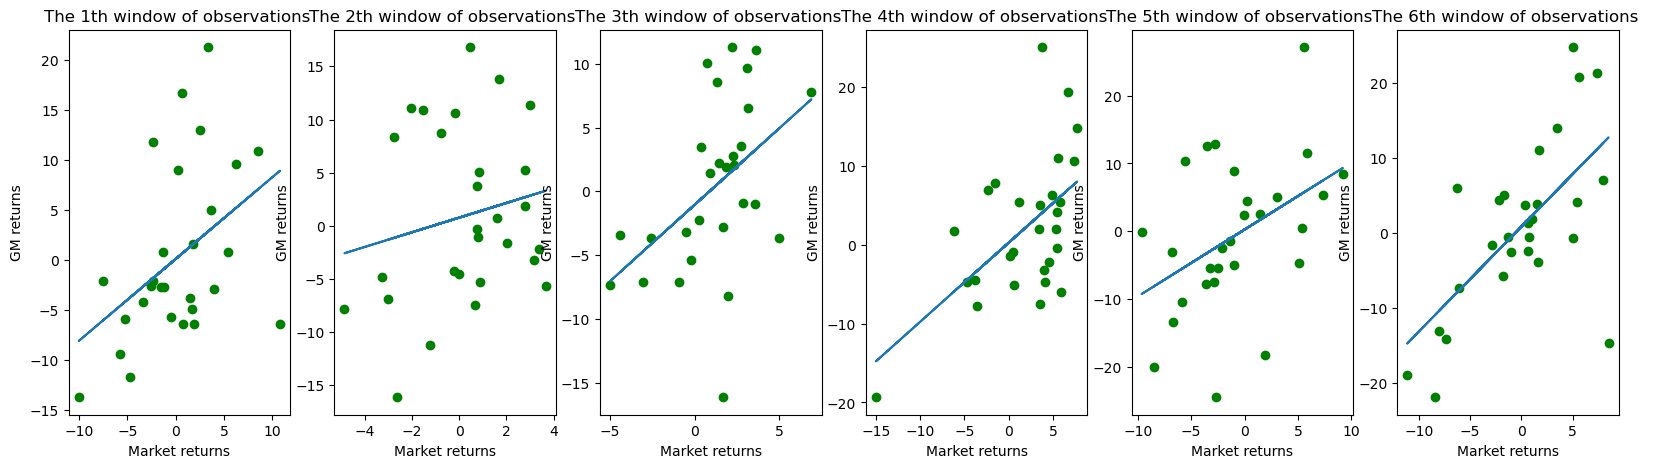

In [47]:
j = 0
fig, axes = plt.subplots(1, 6, figsize=(20, 5))
for i in range(6):
    y = data['GM'][0+j: 28 + j]
    x = sm.add_constant(data['SP5'][0+j: 28 + j])
    model = sm.OLS(y, x).fit()
    a= model.params[0]
    b = model.params[1]
    axes[i].scatter(data['SP5'][0+j: 28 + j],data['GM'][0+j: 28 + j],color= 'green')
    axes[i].set_xlabel('Market returns')
    axes[i].set_ylabel('GM returns')
    axes[i].plot(data['SP5'][0+j: 28 + j], a + b*data['SP5'][0+j: 28 + j] )
    axes[i].set_title(f'The {i+1}th window of observations ')
    j = j + 28
    
plt.show()


The conclusion sited before about the regression parameters being approximately constant over time (static and no need for the time subscript) can be visually inspected by watching how the slope of the line is almost the same when a window of 28 observations is used to run the regression. 